In [1]:
import pandas as pd
import numpy as np

import statsmodels.api as sm

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_excel('Homework Data.xlsx', sheet_name='Data')

In [3]:
selected_columns = ['wage','female','nonwhite','union','education','exper','age']

In [4]:
sample_data = data[selected_columns].iloc[:500]

In [5]:
sample_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   wage       500 non-null    float64
 1   female     500 non-null    object 
 2   nonwhite   500 non-null    object 
 3   union      500 non-null    object 
 4   education  500 non-null    float64
 5   exper      500 non-null    float64
 6   age        500 non-null    float64
dtypes: float64(4), object(3)
memory usage: 27.5+ KB


In [6]:
??sns.heatmap

# Q 1 

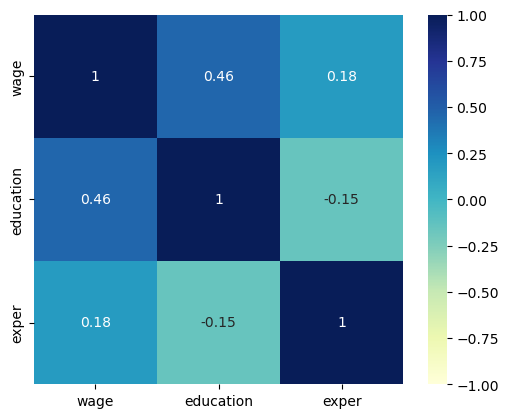

In [7]:
correlations = data[['wage', 'education', 'exper']].corr()

sns.heatmap(correlations, annot=True, cmap='YlGnBu', vmin=-1, vmax=1, square=True)
plt.show()

### data mapping

In [8]:
gender_mapping = {'F': 0, 'M': 1}
sample_data['female'] = sample_data['female'].map(gender_mapping)

In [9]:
sample_data.female.value_counts()

1    262
0    238
Name: female, dtype: int64

In [10]:
race_mapping = {'N': 0, 'W': 1}
sample_data['nonwhite'] = sample_data['nonwhite'].map(race_mapping)

In [11]:
sample_data['nonwhite'].value_counts()

1    410
0     90
Name: nonwhite, dtype: int64

In [12]:
union_mapping = {'N': 0, 'M': 1}
sample_data['union'] = sample_data['union'].map(union_mapping)

In [13]:
sample_data['union'].value_counts()

0    412
1     88
Name: union, dtype: int64

# Q 2

In [14]:
X = sample_data[['female', 'nonwhite', 'union', 'education','exper']]

X = sm.add_constant(X)
y = sample_data['wage']

model1 = sm.OLS(y, X).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.349
Model:                            OLS   Adj. R-squared:                  0.343
Method:                 Least Squares   F-statistic:                     53.06
Date:                Sun, 23 Apr 2023   Prob (F-statistic):           4.73e-44
Time:                        13:57:05   Log-Likelihood:                -1667.0
No. Observations:                 500   AIC:                             3346.
Df Residuals:                     494   BIC:                             3371.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -14.1157      1.761     -8.017      0.0

# Q 4

In [16]:
X_all = sample_data[['female','nonwhite','union','education','exper','age']]
X_all = sm.add_constant(X_all)

model2 = sm.OLS(y, X_all).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.349
Model:                            OLS   Adj. R-squared:                  0.343
Method:                 Least Squares   F-statistic:                     53.06
Date:                Sun, 23 Apr 2023   Prob (F-statistic):           4.73e-44
Time:                        13:57:34   Log-Likelihood:                -1667.0
No. Observations:                 500   AIC:                             3346.
Df Residuals:                     494   BIC:                             3371.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.3525      0.152     -8.895      0.0

# Q 5

In [19]:
sample_data['edu_gender'] = sample_data['education'] * sample_data['female']
sample_data['edu_race'] = sample_data['education'] * sample_data['nonwhite']
sample_data['edu_union'] = sample_data['education'] * sample_data['union']
sample_data['exper_gender'] = sample_data['exper'] * sample_data['female']
sample_data['exper_race'] = sample_data['exper'] * sample_data['nonwhite']
sample_data['exper_union'] = sample_data['exper'] * sample_data['union']

In [21]:
X_interaction = sample_data[['education', 'exper', 'female', 'nonwhite', 'union', 'edu_gender', 'edu_race', 'edu_union', 'exper_gender', 'exper_race', 'exper_union']]
X_interaction = sm.add_constant(X_interaction)
y = sample_data['wage']

interaction_model = sm.OLS(y, X_interaction).fit()
print(interaction_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.359
Model:                            OLS   Adj. R-squared:                  0.344
Method:                 Least Squares   F-statistic:                     24.80
Date:                Sun, 23 Apr 2023   Prob (F-statistic):           1.01e-40
Time:                        14:03:34   Log-Likelihood:                -1663.4
No. Observations:                 500   AIC:                             3351.
Df Residuals:                     488   BIC:                             3401.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -6.4643      4.548     -1.421   

# Q 6

In [23]:
def forward_selection(X, y, threshold_in=0.05):
    initial_features = X.columns.tolist()
    best_features = []
    while len(initial_features) > 0:
        remaining_features = list(set(initial_features) - set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for feature in remaining_features:
            model = sm.OLS(y, sm.add_constant(X[best_features + [feature]])).fit()
            new_pval[feature] = model.pvalues[feature]
        min_pval = new_pval.min()
        if min_pval < threshold_in:
            best_features.append(new_pval.idxmin())
        else:
            break
    return best_features

In [24]:
X_all = sample_data.drop('wage', axis=1)  # Drop the dependent variable 'wage'
y = sample_data['wage']

In [27]:
best_features = forward_selection(X_all, y)
print("Selected features: ", best_features)

X_selected = sm.add_constant(X_all[best_features])
stepwise_model = sm.OLS(y, X_selected).fit()
print(stepwise_model.summary())

/var/folders/h9/b9hqt5sd69gc_yd08sw3y6tr0000gn/T/ipykernel_5414/1422717566.py:6: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
/var/folders/h9/b9hqt5sd69gc_yd08sw3y6tr0000gn/T/ipykernel_5414/1422717566.py:6: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
/var/folders/h9/b9hqt5sd69gc_yd08sw3y6tr0000gn/T/ipykernel_5414/1422717566.py:6: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
/var/folders/h9/b9hqt5sd69gc_yd08sw3y6tr0000gn/T/ipykernel_5414/1422717566.py:6: FutureWarning: The default dtype for empty Ser

Selected features:  ['education', 'exper_gender', 'exper_race', 'edu_gender', 'age', 'exper']
                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.354
Model:                            OLS   Adj. R-squared:                  0.348
Method:                 Least Squares   F-statistic:                     54.18
Date:                Sun, 23 Apr 2023   Prob (F-statistic):           7.96e-45
Time:                        14:05:53   Log-Likelihood:                -1665.1
No. Observations:                 500   AIC:                             3342.
Df Residuals:                     494   BIC:                             3368.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

/var/folders/h9/b9hqt5sd69gc_yd08sw3y6tr0000gn/T/ipykernel_5414/1422717566.py:6: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)


# Q 8

In [34]:
??stepwise_model

In [30]:
residuals = stepwise_model.resid

/var/folders/h9/b9hqt5sd69gc_yd08sw3y6tr0000gn/T/ipykernel_5414/1006844431.py:3: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  qq_plot.show()


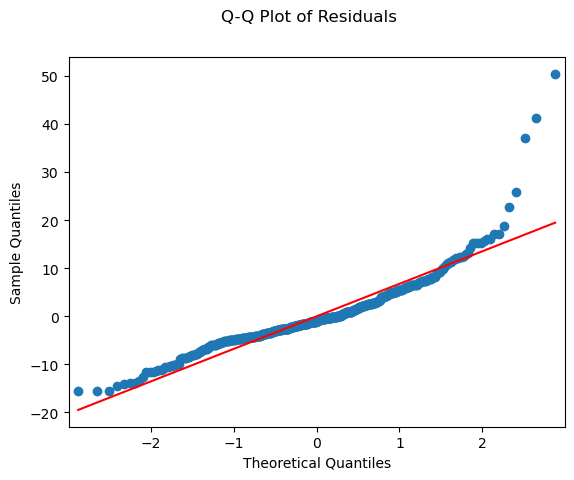

In [32]:
qq_plot = sm.qqplot(residuals, line='s')
qq_plot.suptitle("Q-Q Plot of Residuals")
qq_plot.show()

# Q 9

In [35]:
print(stepwise_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.354
Model:                            OLS   Adj. R-squared:                  0.348
Method:                 Least Squares   F-statistic:                     54.18
Date:                Sun, 23 Apr 2023   Prob (F-statistic):           7.96e-45
Time:                        14:11:41   Log-Likelihood:                -1665.1
No. Observations:                 500   AIC:                             3342.
Df Residuals:                     494   BIC:                             3368.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -1.1031      0.147     -7.493   

Coefficient: If the coefficient of the 'gender' variable is positive, it indicates that males (assuming 'M' is coded as 1 and 'F' as 0) tend to have higher wages than females, on average. If the coefficient is negative, it suggests that females tend to have higher wages than males, on average.


P-value: The p-value of the 'gender' variable helps you determine if the relationship between gender and wage is statistically significant. If the p-value is below a chosen significance level (e.g., 0.05), it indicates that the relationship between gender and wage is statistically significant, suggesting the presence of a gender bias in the wage rate.

# Q 10

Coefficient: If the coefficient of the 'edu_union' variable is positive, it suggests that the advantage of union membership is greater for individuals with higher education levels. In other words, the positive effect of union membership on wages is stronger for those with higher education. If the coefficient is negative, it implies that the advantage of union membership is smaller for individuals with higher education levels.


P-value: The p-value of the 'edu_union' variable helps you determine if the relationship between the interaction term and the wage is statistically significant. If the p-value is below a chosen significance level (e.g., 0.05), it indicates that the relationship between the interaction term (education and union) and the wage is statistically significant, suggesting that the advantage of union membership varies based on education levels.

In [36]:
print(interaction_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.359
Model:                            OLS   Adj. R-squared:                  0.344
Method:                 Least Squares   F-statistic:                     24.80
Date:                Sun, 23 Apr 2023   Prob (F-statistic):           1.01e-40
Time:                        14:15:21   Log-Likelihood:                -1663.4
No. Observations:                 500   AIC:                             3351.
Df Residuals:                     488   BIC:                             3401.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -6.4643      4.548     -1.421   